#### Aidez des investisseurs à bien gérer leurs portefeuilles 

 > Contexte du projet
 
Des investisseurs souhaitent mieux gérer leurs portefeuilles boursiers. Ils font appel à vos services pour que vous les aidiez à visualiser au mieux leurs données. Cela leur permettraient dans quelles actions ils serait judicieux d'investir. 


# PARTIE 1 

In [110]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
import warnings 
from collections import defaultdict
from datetime import datetime
os.chdir(r"/home/alex/Documents/Simplon/Projet_B_Finances/projet_analyse_financiere")

In [111]:
dirname=r"/home/alex/Documents/Simplon/Projet_B_Finances/projet_analyse_financiere"
filename='stock.csv'
bourse=pd.read_csv(os.path.join(dirname, filename), sep=',')

# PHASE EXPLORATOIRE

#### Analyse du volume, du type, ... des données. 

#### Focntions helpers 

In [112]:
def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [113]:
def print_header(s):
    print(s)
    print("-"*len(s))
    
def nunique_values(labels_dict, df):
    table=[]
    for type_cols, _ in labels_dict.items():
        for col in labels_dict[type_cols]:
            table.append([col, df[col].nunique(), type_cols])
    return table

def columns_type_and_none_and_uniques(df):
    tables_to_print=[]
    label_per_type = defaultdict(list)
    for idx,lbl in enumerate (df.dtypes.index):
        label_per_type[ str(df.dtypes[idx]) ].append(lbl)
    tables_to_print.append(existNone(label_per_type, df))
    tables_to_print.append(nunique_values(label_per_type, df))
    return tables_to_print

def duplicates(df):
    table=[]
    for col in df.columns:
        table.append([col, df[col].duplicated().sum()])
    return table

def proportion_nones(df):
    table=[]
    for col in df.columns:
        if (df[col].isna().sum()!=0):
            percent=(df[col].isna().sum()/df.shape[0])*100
            table.append([col, round(percent, 3)])
    return table 

def duplicates_prop_nones(df):
    tables_to_print2=[]
    tables_to_print2.append(duplicates(df))
    tables_to_print2.append(proportion_nones(df))
    return tables_to_print2 

def print_info_df(df):
        tables_to_print=columns_type_and_none_and_uniques(df)
        dp0=pd.DataFrame(tables_to_print[0]).rename(columns={0:"Column", 1:"Nb.NaNs", 2:"Type"})
        dp1=pd.DataFrame(tables_to_print[1]).rename(columns={0:"Column", 1:"Uniques", 2:"Type"})
        display_side_by_side([dp0.set_index("Column"),dp1.set_index("Column")], ['Number of NaNs per column', 'Uniques par column'])

In [114]:
def print_info_df_duplicates(df):
        tables_to_print2=duplicates_prop_nones(df)
        dp0=pd.DataFrame(tables_to_print2[0]).rename(columns={0:"Column", 1:"Nb.duplicates"})
        dp1=pd.DataFrame(tables_to_print2[1]).rename(columns={0:"Column", 1:"Proportion NaNs in columns with NaNs"})
        if(len(dp1)==0):
            display_side_by_side([dp0.set_index("Column")], ['Nb.duplicates'])
        else:
            display_side_by_side([dp0.set_index("Column"),dp1.set_index("Column")], ['Nb.duplicates', 'Proportion NaNs in each column'])

####  Note : Je considère que l'étape 2 doit être en fait étape 1. Je réponds aux questions de cet étape 2 en premier. 

### Etape 2

> Etape 2 : Je caractérise mes données. 
* Quels types de variable contient mon dataset ? 
* Utilise la fonction info(). Qu’indique-t-elle ? 
* Y a-t-il des données manquantes qui m’empêcheront de visualiser ce que je souhaite ? 
* Écris  une fonction qui indique le nombre de valeur nulle contenue dans une colonne (le nombre de valeur nulle par action) Utilise pour cela la fonction isNull.

In [115]:
print_info_df(bourse)

,Nb.NaNs,Type
Column,,
Date,0,object
AAPL,0,float64
BA,0,float64
T,0,float64
MGM,0,float64
AMZN,0,float64
IBM,0,float64
TSLA,0,float64
GOOG,0,float64


In [116]:
print_info_df_duplicates(bourse)

,Nb.duplicates
Column,
Date,0
AAPL,102
BA,194
T,1146
MGM,766
AMZN,22
IBM,290
TSLA,104
GOOG,19


> La fonction .info() donne un synthèse du nom des colonnes, des index, du nombre de lignes non nulles et du type des données.

> Il n'y a pas des données manquantes.

> Le jeux de données contient un Date (objet) et 9 colonnes de type float64. 

In [117]:
bourse.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


* Écris  une fonction qui indique le nombre de valeur nulle contenue dans une colonne (le nombre de valeur nulle par action) Utilise pour cela la fonction isNull.

In [118]:
bourse.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

###  Etape 1

> Etape 1 : 
* Que contient mon jeu de données ?
* Découvrons tout d’abord ce que mon dataset contient en répondant aux questions suivantes : 

*  Quel volume de données vais-je devoir traiter ?  

<b> Réponse : petit volume, 2159 enrégistrements seulement avec 10 colonnes (1 date et 9 actions) </b>

* Écris une fonction qui lis uniquement les 15 premières lignes de mon jeu de données.
* Écris une fonction qui affiche les dernières lignes.


In [119]:
#General function the can output the first n lines of a dataframe
def read_records_first(df, n):
    return df.iloc[:n,]
read_records_first(bourse,15)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000
5,2012-01-20,60.042858,75.519997,30.510000,12.64,190.929993,188.520004,26.600000,291.900879,1315.380005
6,2012-01-23,61.058571,75.510002,30.400000,13.14,186.089996,189.979996,26.770000,291.666748,1316.000000
7,2012-01-24,60.058571,75.360001,30.090000,13.16,187.000000,191.929993,27.420000,289.380341,1314.650024
8,2012-01-25,63.808571,75.820000,30.209999,13.11,187.800003,191.729996,27.969999,283.681702,1326.060059
9,2012-01-26,63.518570,75.309998,29.450001,13.05,193.320007,190.979996,28.940001,282.989288,1318.430054


In [120]:
#General function the can output the last n lines of a dataframe
def read_records_last(df, n):
    return df.iloc[(df.shape[0]-n):,]
read_records_last(bourse,5)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971
2158,2020-08-11,437.500000,180.130005,30.200001,21.500000,3080.669922,126.750000,1374.390015,1480.319946,3333.689941


In [121]:
bourse.iloc[:15,]

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000
5,2012-01-20,60.042858,75.519997,30.510000,12.64,190.929993,188.520004,26.600000,291.900879,1315.380005
6,2012-01-23,61.058571,75.510002,30.400000,13.14,186.089996,189.979996,26.770000,291.666748,1316.000000
7,2012-01-24,60.058571,75.360001,30.090000,13.16,187.000000,191.929993,27.420000,289.380341,1314.650024
8,2012-01-25,63.808571,75.820000,30.209999,13.11,187.800003,191.729996,27.969999,283.681702,1326.060059
9,2012-01-26,63.518570,75.309998,29.450001,13.05,193.320007,190.979996,28.940001,282.989288,1318.430054


In [122]:
bourse.head(15)
bourse.tail()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971
2158,2020-08-11,437.500000,180.130005,30.200001,21.500000,3080.669922,126.750000,1374.390015,1480.319946,3333.689941


> Que contient mon jeu de donnée ?

* Écris une fonction qui fais apparaitre le nom de mes actions.
* Écris une fonction qui m’indique le nombre d’actions que contient mon jeu de données.
* Écris une fonction qui fait apparaître le cours moyen d’une action.

 ##### Le jeux de donnée contient des séries temporelles (evolution de chaqune des actions en cours du temps).

* Écris une fonction qui fais apparaitre le nom de mes actions.

In [123]:
def list_actions(df):
    l=[df.columns[i] for i in range(1, len(df.columns))]
    return (', '.join(action for action in l))
    print(*l, sep=' ')
print("The names of the actions are {}".format(list_actions(bourse)))

The names of the actions are AAPL, BA, T, MGM, AMZN, IBM, TSLA, GOOG, sp500


* Écris une fonction qui m’indique le nombre d’actions que contient mon jeu de données.

In [124]:
print("The number of actions is {}".
                                    format(len(list_actions(bourse).split(','))))

The number of actions is 9


In [125]:
bourse["AAPL"].shape[0]

2159

In [126]:
bourse.head(2)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966


* Écris une fonction qui fait apparaître le cours moyen d’une action.

In [127]:
def mean_action (action_series):
    sum=0
    for i in range(0,action_series.shape[0]):
        sum=sum+action_series[i]
    if(action_series.shape[0]==0):
        return -1
    else:
        return sum/action_series.shape[0]

In [128]:
list_mean=[mean_action(bourse[bourse.columns[i]]) 
                   for i in range(1, len(bourse.columns))]

In [129]:
actions_list=[bourse.columns[i] for i in range(1, len(bourse.columns))] 

In [130]:
action_and_mean={i:[j] for (i, j) in zip(actions_list,list_mean) if j!=-1}

In [131]:
table = pd.DataFrame(data=action_and_mean)
table

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,140.819823,189.9427,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554


* Je comprends qu’il s’agit du cours des actions en fonction du temps, je m’assure qu’elles sont rangées en ordre. Écris  une fonction qui les trient par date.

In [132]:
bourse.sort_values(by="Date", inplace=True)

In [133]:
bourse.head(4)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039


* Je souhaite avoir une vision générale des propriétés statistiques de mes données. Pour cela j’utilise la fonction .describe(). Quelles sont les informations qu’elles me fournit ? Donne une définition précise de chaque paramètre.

In [134]:
bourse.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


> La fonction .describe() donne un aperçu des indicateurs statistiques principaux pour chaque colonne (action ici). 

1. count : Nombre de lignes qui ne sont pas NaN/Null.
2. mean : La moyenne est indicateur statistique, c'est la somme de toutes les valeurs de la série donnée divisée par le nombre total des valeurs dans la série. 
3. std : L'écart-type est la racine carrée de la variance. Il mesure la dispersion des valeurs d'un échantillon statistique ou d'une distribution de probabilité autour de la moyenne. 
4. min : Valeur minimum.
5. 25% : Le centile 25% (ou le premier quartile) est la donnée de la série qui sépare les 25 % inférieurs des données. 
6. 50% : Le 2e quartile est la donnée de la série qui sépare les 50 % inférieurs des données. Il est appelé la medianne.  
7. 75% : Le 3e quartile est la donnée de la série qui sépare les 75 % inférieurs des données
8. max : Valeur maximum.

# PHASE ANALYSE : PARTIE 1

* Ayant 2 catégories de variables (Date et Action) Je visualise une première fois l’intégralité de mes données : Trace un plot simple qui permet de visualiser le cours des actions en fonction du temps. Ajoute titre légende et axes.

In [135]:
list(bourse.columns[1:])

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]),
 <a list of 10 Text major ticklabel objects>)

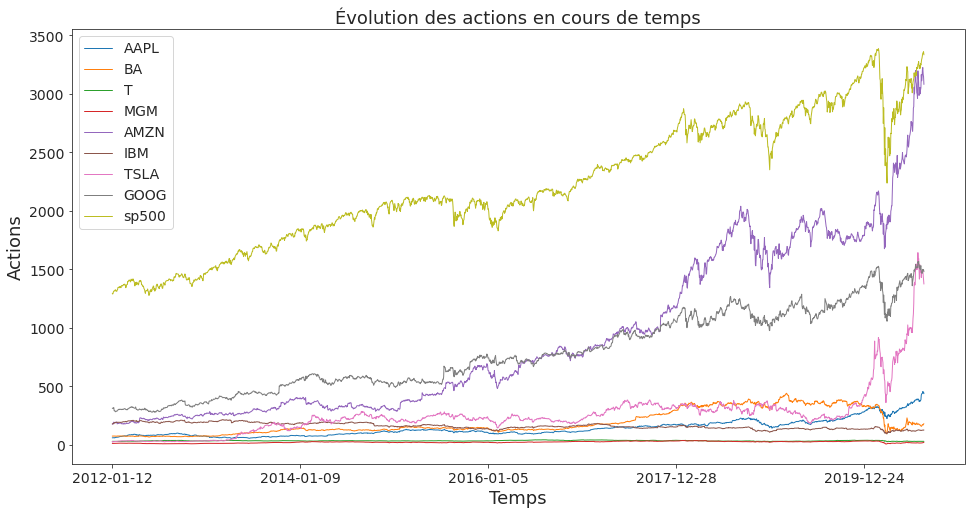

In [136]:
bourse.plot(x = 'Date', y=list(bourse.columns[1:]), linewidth = 1, figsize=(16,8))
plt.title("Évolution des actions en cours de temps", fontsize=18)
plt.ylabel('Actions', fontsize = 18)
plt.xlabel('Temps', fontsize = 18)
plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

### Rémark : J'ai choisi d'utiliser le Z-score normalisation à la place de la fonction dans le guide.

 #### Z-score normalization

* A quoi sert de normaliser mes données ? 
* Trace un graphe permettant de visualiser les données normalisées.
* Que remarques tu ? Quelle(s) action(s) a connu une forte croissance ?

> La normalisation des données est utilisée afin de faire les variables de différentes échelles avoir de valeurs comparables (dans la même échelle).

In [137]:
def normalize(action_series):
    return (action_series-action_series.mean())/action_series.std()

In [138]:
normalized=[normalize(bourse[bourse.columns[i]]) 
                   for i in range(1, len(bourse.columns))] 

In [139]:
bourse_normalized = pd.DataFrame(data=normalized)

In [140]:
bourse_normalized.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158
AAPL,-1.138275,-1.141461,-1.131598,-1.122703,-1.125447,-1.140473,-1.126132,-1.140251,-1.087306,-1.091400,...,3.379194,3.444140,4.012845,4.164057,4.205143,4.227592,4.444456,4.286891,4.378098,4.188765
BA,-1.103725,-1.112503,-1.106330,-1.108066,-1.103243,-1.103629,-1.103725,-1.105172,-1.100736,-1.105655,...,-0.230836,-0.269995,-0.308094,-0.266909,-0.239902,-0.151070,-0.171132,-0.192158,-0.101590,-0.094645


In [141]:
bourse_normalized=bourse_normalized.transpose()

In [142]:
bourse_normalized["Date"]=bourse["Date"]

In [143]:
bourse_normalized.head(3)

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500,Date
0,-1.138275,-1.103725,-1.572226,-1.576103,-1.060038,0.731439,-1.096512,-1.405504,-1.718243,2012-01-12
1,-1.141461,-1.112503,-1.587815,-1.544512,-1.056470,0.677061,-1.122390,-1.412430,-1.730173,2012-01-13
2,-1.131598,-1.106330,-1.531696,-1.558872,-1.051827,0.709923,-1.104332,-1.407083,-1.721649,2012-01-17


In [144]:
column_names = ["Date", "AAPL", "BA", "T", "MGM", "AMZN", "IBM", "TSLA", "GOOG", "sp500"]
bourse_normalized = bourse_normalized.reindex(columns=column_names)

In [145]:
bourse_normalized.head(5)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,-1.138275,-1.103725,-1.572226,-1.576103,-1.060038,0.731439,-1.096512,-1.405504,-1.718243
1,2012-01-13,-1.141461,-1.112503,-1.587815,-1.544512,-1.056470,0.677061,-1.122390,-1.412430,-1.730173
2,2012-01-17,-1.131598,-1.106330,-1.531696,-1.558872,-1.051827,0.709923,-1.104332,-1.407083,-1.721649
3,2012-01-18,-1.122703,-1.108066,-1.506754,-1.489944,-1.040678,0.751782,-1.103337,-1.400634,-1.694905
4,2012-01-19,-1.125447,-1.103243,-1.478695,-1.479892,-1.033499,0.730266,-1.103574,-1.390714,-1.682883


### NB : Z-score normalisation est utilisée aussi dans le graphe à la place de la fonction 'normalize' dans le guide

(array([-4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 7 Text major ticklabel objects>)

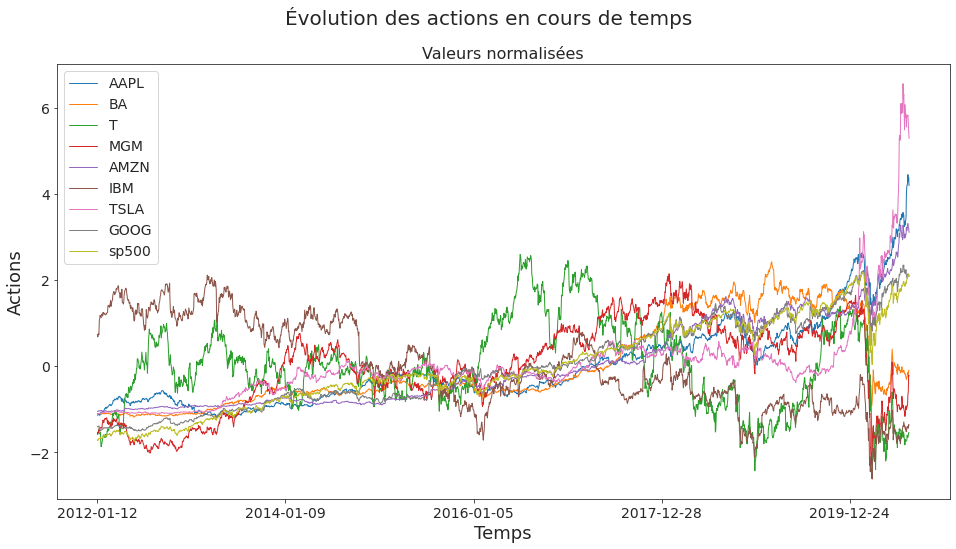

In [146]:
bourse_normalized.plot(x = 'Date', y=list(bourse.columns[1:]), linewidth = 1, figsize=(16,8))
plt.suptitle("Évolution des actions en cours de temps", fontsize = 20)
plt.title("Valeurs normalisées", fontsize=16)
plt.ylabel('Actions', fontsize = 18)
plt.xlabel('Temps', fontsize = 18)
plt.legend(loc='best', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [147]:
bourse_normalized.mean()

AAPL    -4.547441e-15
BA       8.113910e-16
T        2.843138e-14
MGM      7.053310e-16
AMZN     5.915704e-16
IBM     -1.036338e-14
TSLA     1.847526e-15
GOOG     4.391320e-15
sp500   -2.059183e-15
dtype: float64

In [148]:
bourse_normalized.std()

AAPL     1.0
BA       1.0
T        1.0
MGM      1.0
AMZN     1.0
IBM      1.0
TSLA     1.0
GOOG     1.0
sp500    1.0
dtype: float64

_Trace un graphe permettant de visualiser les données normalisées Que remarquestu ?_


>Les donnés sont centrées et réduites. Moyenne 0, écart-type 1.

_Quelles actions ont connu une forte croissance ?_

> L'action TSLA a connu une forte croissance. 
# PARTIE 2 ANALYSE EXPLORATOIRE INTERACTIVE

In [149]:
# Utilisons la librairie plotly express pour avoir un graphe interactif
# voici la doc associée :  https://plotly.com/python/
import plotly.express as px

def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # on fait une boucle sur chaque action (noter que j'ignore l'index de colonne 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # j'ajoute a ma figure un graphe 

  fig.show()

In [150]:
# je trace mon graphe intéractif
interactive_plot(bourse, 'Évolution des actions au cours du temps')



 * Faites de même avec les valeurs normalisées. 


In [151]:
interactive_plot(bourse_normalized, 'Évolution des actions (normalisées) au cours du temps')

*  On remarque une baisse massive des actions en 2020, imaginons que votre client possède 100 actions du SP500. Il les avait achetées le 19 février 2020. Combien a-t-il perdu le 23 mars 2020 ?

In [152]:
bourse['Date']=pd.to_datetime(bourse['Date'].astype(str), format='%Y-%m-%d', errors='coerce')

In [153]:
bourse[(bourse["Date"]=='2020-02-19') | (bourse["Date"]=='2020-03-23')]

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
2037,2020-02-19,323.619995,338.299988,38.439999,32.09,2170.219971,150.860001,917.419983,1526.689941,3386.149902
2060,2020-03-23,224.369995,105.620003,26.770000,9.15,1902.829956,94.769997,434.290009,1056.619995,2237.399902


In [154]:
decrease=(bourse[bourse["Date"]=='2020-02-19']["sp500"]).values[0]-(bourse[bourse["Date"]=='2020-03-23']["sp500"]).values[0]
loss_100=decrease*100

In [155]:
print("The finantial loss endured for the action sp500 is {}".format(loss_100))

The finantial loss endured for the action sp500 is 114875.0


In [156]:
bourse_normalized['Date']=pd.to_datetime(bourse_normalized['Date'].astype(str), format='%Y-%m-%d', errors='coerce')

# CALCUL DU COURS DES ACTIONS

In [157]:
# Calculons le cours journalier pour un seule action
# Prenons l'ex de SP500
df = bourse['sp500']
df_cours = df.copy()

    # On boucle sur chaque élément du dataframe 
for j in range(1, len(df)):
    # On calcule la variation du cours en fonction du jour précédent (en %)
    df_cours[j] = ((df[j]- df[j-1])/df[j-1]) * 100

    # On met un zero pour la première ligne (elle sert de référence)
df_cours[0] = 0
df_cours

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

* Calculez maintenant le cours de toutes les actions. Appelez cette fonction actions_cours (nous la réutiliserons).
* Présentez les résultats sous forme de dataframe en fonction des actions.

In [158]:
bourse.head(4)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039


In [159]:
bourse_temp=bourse.drop(columns=["Date"])

In [160]:
bourse_temp.head(2)

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966


In [161]:
bourse_temp['sp500'].copy()

0       1295.500000
1       1289.089966
2       1293.670044
3       1308.040039
4       1314.500000
           ...     
2154    3327.770020
2155    3349.159912
2156    3351.280029
2157    3360.469971
2158    3333.689941
Name: sp500, Length: 2159, dtype: float64

In [162]:
def actions_cours(series, series_cours):
    
    for i in range(1, series.shape[0]):
        series_cours[i] = ((series[i]- series[i-1])/series[i-1]) * 100    
    series_cours[0]=0
    return series_cours  

In [163]:
list_actions=[actions_cours(bourse_temp[col],bourse_temp[col].copy()) 
                                      for col in bourse_temp.columns]

In [164]:
type(list_actions[0])

pandas.core.series.Series

In [165]:
actions_list

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']

In [166]:
frame = { actions_list[i]: list_actions[i] for i in range(0, len(list_actions))} 

In [167]:
actions_cours_df=pd.DataFrame(frame)

In [168]:
actions_cours_df.head(5)

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866


In [169]:
actions_cours_df.insert (0, "Date", bourse["Date"])

In [170]:
actions_cours_df.head(4)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793


In [91]:
def actions_cours_second_version(df):
    actions_cours_df = df.iloc[:,[i for i in range(df.shape[1]) if i != 0]].pct_change().fillna(0)*100
    return actions_cours_df

In [94]:
actions_cours_second_version(bourse)

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...
2154,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222



> Voila ce que vous êtes censé obtenir : 

# CALCUL DES CORRELATIONS  

In [180]:
actions_cours_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


In [181]:
# Voici une fonction qui vous permet de calculer les correlations entre le cours des actions 
# notez qu'on supprime la colonne date (elle n'est pas interessante)
cm = actions_cours_df.drop(columns = ['Date']).corr()

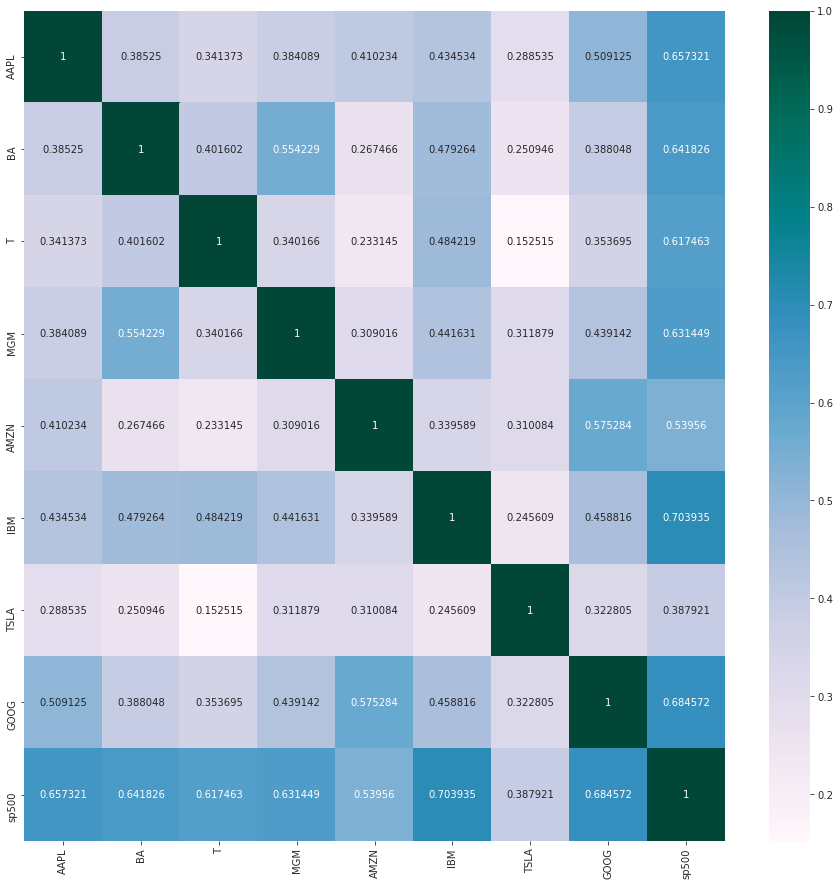

In [173]:
# Tracez une heatmap avec la bibliothèque seaborn.
sns.set_style('ticks')
fig, ax = plt.subplots()
plt.xticks(rotation='90')
fig.set_size_inches(15.7, 15.27)
sns.heatmap(cm, annot=True, fmt="g", cmap='PuBuGn')
plt.show()


* Quelles sont les 2 actions corrélées positivement avec S&P500?**

> Tous sont positivement corrélées avec sp500.  Mais si on considère une valeur comme la valeur minimum (in absolute value) afin de pouvoir dire que les deux variables sont corrélées, dans ce cas si on choisi ~0.7 comme un seuil, les deux actions corrélées positivement avec sp500 sont GOOG et IBM.

* Quelle est la corrélation entre  Amazon et Boeing?

> AMZN-BA : 0.267 (non significative)

* Quelle est la corrélation entre MGM et Boeing?

> MGM-BA : 0.554 (modérée)

In [174]:
cm

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385250,0.341373,0.384089,0.410234,0.434534,0.288535,0.509125,0.657321
BA,0.385250,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384089,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439142,0.631449
AMZN,0.410234,0.267466,0.233145,0.309016,1.000000,0.339589,0.310084,0.575284,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245609,0.458816,0.703935
TSLA,0.288535,0.250946,0.152515,0.311879,0.310084,0.245609,1.000000,0.322805,0.387921
GOOG,0.509125,0.388048,0.353695,0.439142,0.575284,0.458816,0.322805,1.000000,0.684572
sp500,0.657321,0.641826,0.617463,0.631449,0.539560,0.703935,0.387921,0.684572,1.000000


# HISTOGRAMME ET CALCUL DE RISQUE

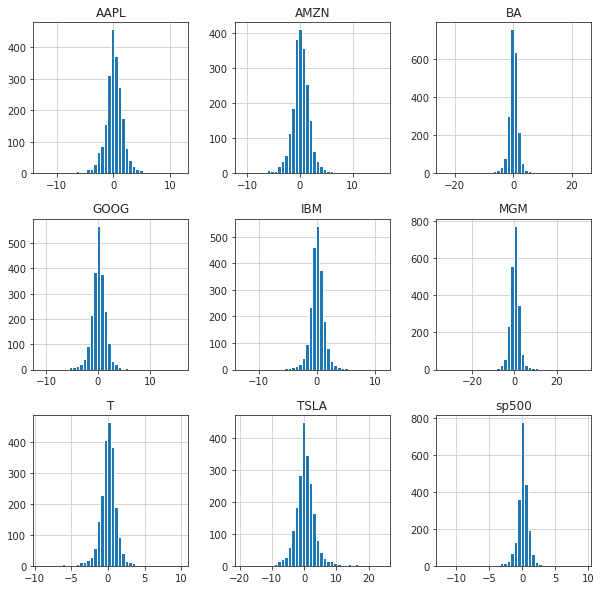

In [185]:
# Voici l'histogramme du cours des actions 
# Remarquez comment l'écart-type de Tesla est élevé, cela indique que l'action fluctue beaucoup ! 
actions_cours_df.hist(figsize=(10, 10), bins = 40);


* En se basant sur l'histogramme d'après vous quelle est l'action la plus risquée ?T ou TSLA ?

In [176]:
actions_cours_df["TSLA"].std()>actions_cours_df["T"].std()

True

>L'action la plus risquée est TSLA. TSLA fluctue plus que T, son écart-type est plus grand que celui de T. 

# BRAVO !